In [1]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
stop_words = stopwords.words('english')

In [3]:
columns = ["polarity", "tweet_id", "date", "query", "user_id", "tweet" ]
data = pd.read_csv("data/training.1600000.processed.noemoticon.csv", \
                   header=None, names=columns , encoding="ISO-8859-1")

In [4]:
data.head()

,polarity,tweet_id,date,query,user_id,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
# shuffle data for train validation test split 
data = data.sample(frac=1).reset_index(drop=True)
data.shape

(1600000, 6)

In [6]:
train, test_val = train_test_split(data, test_size=0.20, random_state=42)
del data

In [7]:
test, val = train_test_split(test_val, test_size=0.50, random_state=42)
del test_val

In [8]:
train.shape, test.shape, val.shape

((1280000, 6), (160000, 6), (160000, 6))

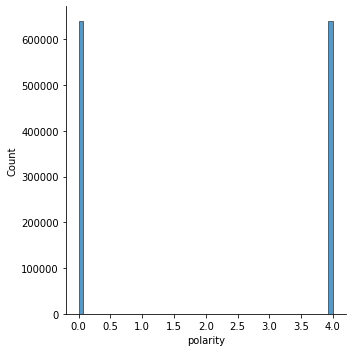

In [9]:
sns.displot(train["polarity"])

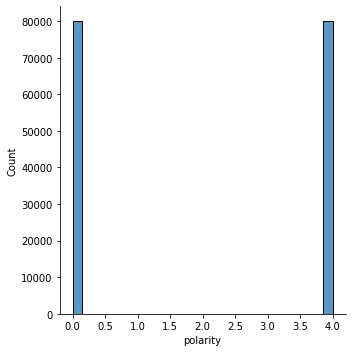

In [10]:
sns.displot(test["polarity"])

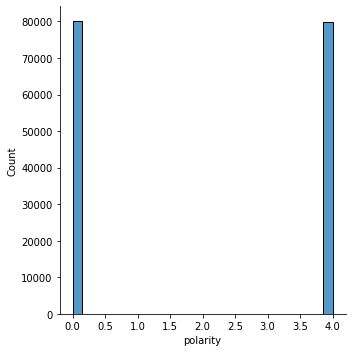

In [11]:
sns.displot(val["polarity"])

# Note: 
This is very simple model I am not going to any crazy feature engineering. Only thing I am going to do is tfidf the tokens to features and train a simple model

In [12]:
def preprocess(sentence, stop_words=stop_words):
    sentence=str(sentence)
    sentence = sentence.lower()
    # remove non numeric and other tokens
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stop_words]
    return " ".join(filtered_words)

In [13]:
train.head(5)

,polarity,tweet_id,date,query,user_id,tweet
1374558,0,2188994761,Mon Jun 15 23:00:39 PDT 2009,NO_QUERY,LuckyLibra101,wishing things would change.... tired of sleep...
1389115,0,1966575566,Fri May 29 18:01:06 PDT 2009,NO_QUERY,betsytownsend,My subway made me so sick I threw it all up
1137831,0,1978117502,Sat May 30 22:29:17 PDT 2009,NO_QUERY,NatalieCorona7,I feel forgotten just by one person..
790714,0,2002620433,Tue Jun 02 04:43:47 PDT 2009,NO_QUERY,MarsGeek,@pato_30stm Im in agony..Sun burn is not good ...
1117911,0,1695337387,Mon May 04 05:52:55 PDT 2009,NO_QUERY,Mander787,hoping with all her might that the darkroom is...


In [14]:
train["tweet_tokens"] = train["tweet"].apply(preprocess)

In [15]:
train.head()

,polarity,tweet_id,date,query,user_id,tweet,tweet_tokens
1374558,0,2188994761,Mon Jun 15 23:00:39 PDT 2009,NO_QUERY,LuckyLibra101,wishing things would change.... tired of sleep...,wishing things would change tired sleeping alo...
1389115,0,1966575566,Fri May 29 18:01:06 PDT 2009,NO_QUERY,betsytownsend,My subway made me so sick I threw it all up,subway made sick threw
1137831,0,1978117502,Sat May 30 22:29:17 PDT 2009,NO_QUERY,NatalieCorona7,I feel forgotten just by one person..,feel forgotten one person
790714,0,2002620433,Tue Jun 02 04:43:47 PDT 2009,NO_QUERY,MarsGeek,@pato_30stm Im in agony..Sun burn is not good ...,pato_30stm agony sun burn good sliced foot bea...
1117911,0,1695337387,Mon May 04 05:52:55 PDT 2009,NO_QUERY,Mander787,hoping with all her might that the darkroom is...,hoping might darkroom flooded school could rui...


In [37]:
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.9, max_features=25000, norm="l2")
train_X = vectorizer.fit_transform(train["tweet_tokens"])


In [38]:
train_Y = train["polarity"]

In [39]:
val["tweet_tokens"] = val["tweet"].apply(preprocess)
val_X = vectorizer.transform(val["tweet_tokens"])
val_Y = val["polarity"]

In [40]:
test["tweet_tokens"] = test["tweet"].apply(preprocess)
test_X = vectorizer.transform(test["tweet_tokens"])
test_Y = test["polarity"]

In [41]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(train_X, train_Y)

In [42]:
clf.score(train_X, train_Y), clf.score(val_X, val_Y)

(0.78215859375, 0.7721125)

In [43]:
clf.score(test_X, test_Y)

0.77276875